In [1]:
from PIL import Image

In [2]:
import cv2

In [3]:
import skimage

In [95]:
image=Image.open('Images/ESP_059712_2245.jpg')

In [ ]:
image.size

In [ ]:
image.crop(box=(0,0,1000,100))

In [97]:
for i in range(2,100):
    if 5673%i ==0:
        print(i)

3
31
61
93


In [98]:
5673/3

1891.0

In [121]:
for i in range(2,100):
    if 2048%i ==0:
        print(i)

2
4
8
16
32
64


In [122]:
2048/2

1024.0

In [ ]:
img=cv2.imread('Cropped/0.jpg').shape

In [ ]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import io

In [ ]:

img = io.imread('Images/ESP_059712_2245.jpg', plugin='matplotlib')


In [ ]:
image=Image.open('Images/ESP_059712_2245.jpg').size

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=((128, 512)))
plt.imshow(roberts(img),cmap=plt.cm.gray)

In [ ]:
from PIL import ImageFilter

imageWithEdges = image.filter(ImageFilter.UnsharpMask)



In [ ]:
imageWithEdges

In [ ]:
image

In [9]:
import numpy as np
def Conv2d(im,kernel=3,stride=1,pad=0):
    img=cv2.filter2D(im,-1,np.array([[-1,1,1],[-1,10,-1],[-1,1,-1]]))
    return img

In [53]:
im=cv2.imread('Cropped/0.jpg')

In [65]:
im=cv2.imread('Images/ESP_059712_2245.jpg')

In [77]:
im=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

In [43]:
import matplotlib.pyplot as plt

In [31]:
img=Conv2d(im)

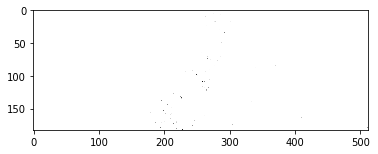

In [32]:
plt.imshow(img)

In [44]:
sift=cv2.xfeatures2d.SIFT_create()

In [45]:
kp=sift.detect(im)

In [46]:
kimg=cv2.drawKeypoints(im,kp,None)

In [50]:
orb=cv2.ORB_create()
kp=orb.detect(im)
kimg=cv2.drawKeypoints(im,kp,None)

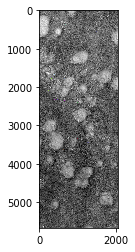

In [51]:
#plt.figure(figsize=(16,8))
plt.imshow(kimg)

In [52]:
cv2.imwrite('featureEng/ORB_ESP_059712_2245.jpg',kimg)

True

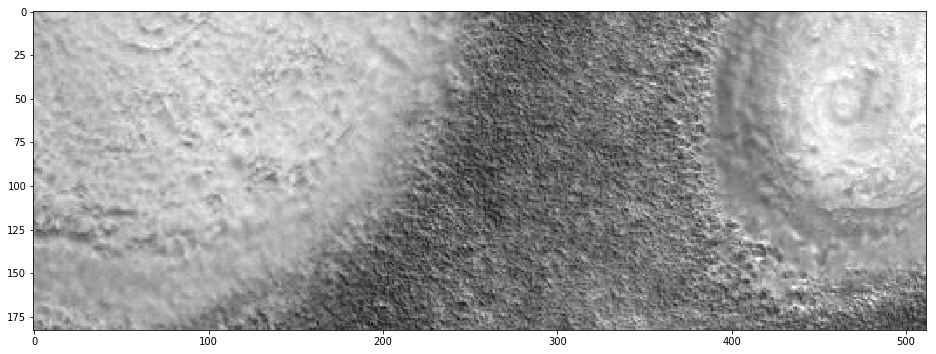

In [38]:
plt.figure(figsize=(16,8))
plt.imshow(im)

In [91]:
c=cv2.Canny(im,300,200)

In [92]:
cv2.imwrite('featureEng/Edge.jpg',c)

True

In [89]:
kp=sift.detect(c)
kimg=cv2.drawKeypoints(c,kp,None)

In [90]:
cv2.imwrite('featureEng/EdgeCanny.jpg',kimg)

True

In [120]:
image=Image.open('Images/ESP_059712_2245.jpg')

In [152]:
from PIL import Image
def crop(im,filepath,width,height):
    imwidth,imheight=im.size
    count=0
    for i in range(0,imwidth,width):
        for j in range(0,imheight,height):
            #print(j)
            box=(i,j,i+width,j+height)
            img=im.crop(box)
            img.save(filepath+str(count)+'.jpg')
            count+=1

In [153]:
crop(image,'Crop3parts/',1024,1891)

In [100]:
import os

In [154]:
def DoEdgeDetect(im):
    
    image=cv2.imread('Crop3parts/'+im)
    print('featureEng/Edge'+im)
    c=cv2.Canny(image,300,200)
    cv2.imwrite('featureEng/Edge'+im,c)

In [155]:
lstDir=os.listdir('Crop3parts')

In [156]:
for i in lstDir:
    if i.endswith('.jpg'):
        DoEdgeDetect(i)

featureEng/Edge4.jpg
featureEng/Edge5.jpg
featureEng/Edge2.jpg
featureEng/Edge3.jpg
featureEng/Edge1.jpg
featureEng/Edge0.jpg


In [166]:
import PIL
list_im = ['Edge3.jpg', '3.jpg', 'Edge2.jpg','2.jpg','Edge0.jpg','0.jpg','Edge1.jpg','1.jpg','Edge5.jpg','5.jpg','Edge4.jpg','4.jpg',  ]
imgs    = [ PIL.Image.open('featureEng/'+i) for i in list_im]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'Trifecta.jpg' )

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [163]:
os.listdir('Crop3parts/')

['4.jpg', '.ipynb_checkpoints', '5.jpg', '2.jpg', '3.jpg', '1.jpg', '0.jpg']